In [2]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import json
#sc.logging.print_header()
file_path = '/work/users/mh823zote/projects/gating/data/CITEseq_Covid/' 
data_dir = file_path + 'data/' 

In [3]:
adata = sc.read_h5ad(data_dir + 'pdata_CD16_CD8_sub_denoised.h5ad')

In [4]:
sc.pp.log1p(adata)

In [5]:
cluster_string = 'CD16+ T cells'

## Joint panel

In [6]:
with open('/work/users/mh823zote/projects/gating/data/CITEseq_Covid/data/07_intersect_AB_citeseq_FACS.json', 'r') as f:
    FACS_panel = json.load(f)


In [7]:
adata = adata[:,FACS_panel]

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.779801     0.799464     0.793708     0.759199     0.753991
recall        0.754203     0.716573     0.706966     0.652522     0.642914
precision     0.807198     0.904040     0.904713     0.907572     0.911464


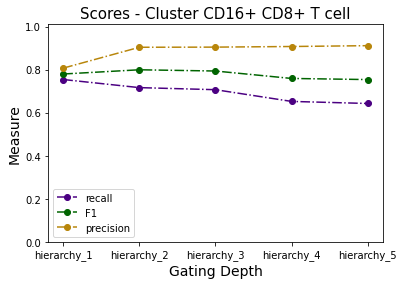

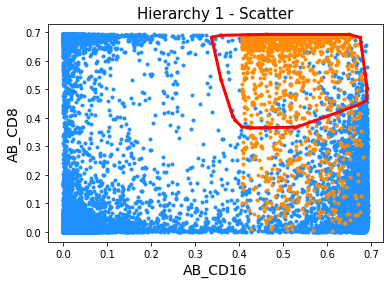

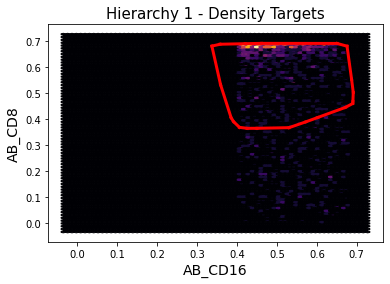

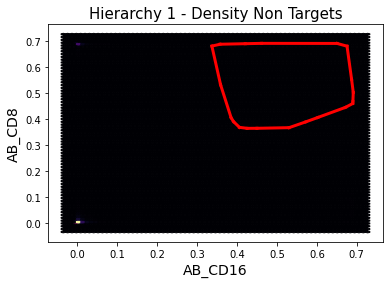

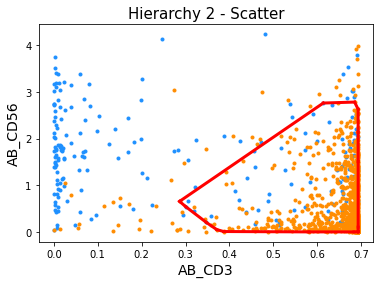

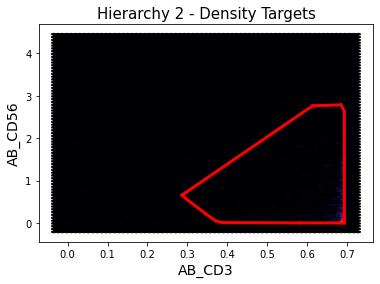

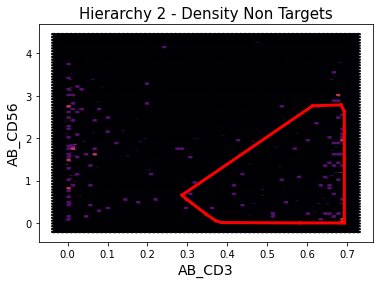

In [9]:
adata = adata.copy()
cluster_numbers = ['CD16+ CD8+ T cell']
cg.tools.gating_strategy(adata,cluster_numbers,cluster_string = cluster_string,add_noise = True)